### Name : Vaishnavi Chavda
### Course : Data Science (Sem -7)
### Roll no: 04

1. Implement functions for encoding and decoding an image using the following methods:

   A. Transform Coding (using DCT for forward transform)

   B. Huffman Encoding

   C. LZW Encoding

   D. Run-Length Encoding

   E. Arithmetic Coding

For each method, display the Compression Ratio and calculate the Root Mean Square 
Error (RMSE) between the original and reconstructed image to quantify any loss o 
information.

In [1]:
import numpy as np
from scipy.fftpack import dct, idct
from PIL import Image
import matplotlib.pyplot as plt
import os
import random
import cv2
import scipy.fftpack
from collections import defaultdict
from heapq import heappush, heappop
import math

In [2]:
# Load the image
image_path = r"C:\Users\Lenovo\Desktop\sunflower.jpg"  # Update with correct extension
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image_array = np.array(image)

In [5]:
def calculate_compression_ratio(original, compressed):
    original_size = original.size * 8  # size in bits (assuming 8 bits per pixel)
    compressed_size = np.count_nonzero(compressed) * 8  # size in bits
    return original_size / compressed_size

def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

### A.Transform Coding (Using DCT)


In [8]:
# Function to perform DCT encoding on an image
def dct_encode(image_array):
    # Apply 2D DCT to the entire image
    dct_image = dct(dct(image_array.T, norm='ortho').T, norm='ortho')
    return dct_image

# Function to perform inverse DCT decoding to reconstruct the image
def dct_decode(dct_image):
    # Apply Inverse 2D DCT to reconstruct the image
    return idct(idct(dct_image.T, norm='ortho').T, norm='ortho')

In [10]:
# Perform DCT encoding and decoding
dct_encoded = dct_encode(image_array)
dct_reconstructed = dct_decode(dct_encoded)

# Clip values to be in the 0-255 range and convert to uint8
reconstructed_image_array = np.uint8(np.clip(dct_reconstructed, 0, 255))

In [12]:
# Calculate Compression Ratio
compression_ratio = calculate_compression_ratio(image_array, dct_encoded)
print(f"Compression Ratio: {compression_ratio:.2f}")

# Calculate RMSE
rmse = calculate_rmse(image_array, reconstructed_image_array)
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

Compression Ratio: 1.00
Root Mean Square Error (RMSE): 0.71


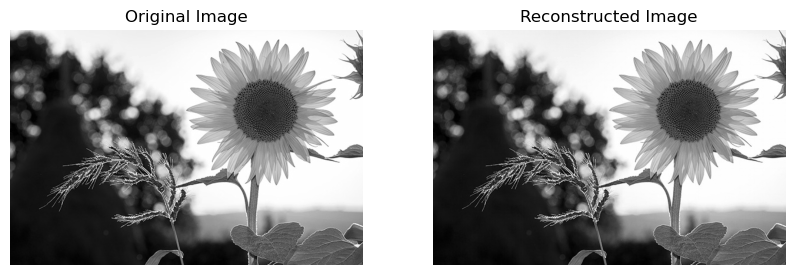

In [14]:
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display the reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image_array, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')

plt.show()

### B. Huffman Encoding for Image Compression


Compression Ratio (Huffman): 1.07
Root Mean Square Error (RMSE) (Huffman): 0.00


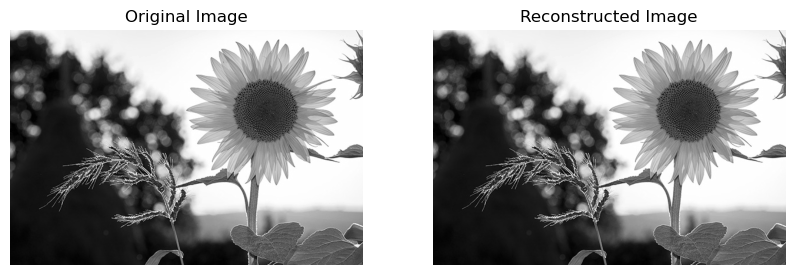

In [23]:
import heapq
from collections import Counter, defaultdict
import numpy as np
import cv2
import matplotlib.pyplot as plt

class HuffmanNode:
    def __init__(self, symbol=None, frequency=0):
        self.symbol = symbol
        self.frequency = frequency
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.frequency < other.frequency

def build_huffman_tree(frequency):
    # Create a priority queue of Huffman nodes
    priority_queue = [HuffmanNode(symbol, freq) for symbol, freq in frequency.items()]
    heapq.heapify(priority_queue)
    
    while len(priority_queue) > 1:
        left = heapq.heappop(priority_queue)
        right = heapq.heappop(priority_queue)
        merged = HuffmanNode(frequency=left.frequency + right.frequency)
        merged.left = left
        merged.right = right
        heapq.heappush(priority_queue, merged)
        
    return priority_queue[0]

def build_huffman_codes(node, prefix="", codebook={}):
    if node.symbol is not None:
        codebook[node.symbol] = prefix
    else:
        build_huffman_codes(node.left, prefix + "0", codebook)
        build_huffman_codes(node.right, prefix + "1", codebook)
    return codebook

def huffman_encode(image_array):
    # Flatten the image and calculate the frequency of each pixel value
    flat_image = image_array.flatten()
    frequency = Counter(flat_image)
    
    # Build the Huffman tree and codebook
    root = build_huffman_tree(frequency)
    codebook = build_huffman_codes(root)
    
    # Encode the image
    encoded_image = ''.join(codebook[pixel] for pixel in flat_image)
    return encoded_image, codebook

def huffman_decode(encoded_image, codebook, shape):
    # Reverse the codebook for decoding
    reverse_codebook = {v: k for k, v in codebook.items()}
    decoded_pixels, buffer = [], ""
    
    for bit in encoded_image:
        buffer += bit
        if buffer in reverse_codebook:
            decoded_pixels.append(reverse_codebook[buffer])
            buffer = ""
            
    return np.array(decoded_pixels).reshape(shape)


# Huffman Encoding
encoded_image, codebook = huffman_encode(image_array)

# Huffman Decoding
reconstructed_image_array = huffman_decode(encoded_image, codebook, image_array.shape)

# Calculate Compression Ratio
compression_ratio = calculate_compression_ratio_huffman(image_array, encoded_image)
print(f"Compression Ratio (Huffman): {compression_ratio:.2f}")

# Calculate RMSE
rmse = calculate_rmse(image_array, reconstructed_image_array)
print(f"Root Mean Square Error (RMSE) (Huffman): {rmse:.2f}")

# Display the original and reconstructed images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Reconstructed Image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image_array, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')

plt.show()

#### Huffman with Quantization

Compression Ratio (Huffman with Quantization): 2.22
Root Mean Square Error (RMSE) (Huffman with Quantization): 0.00


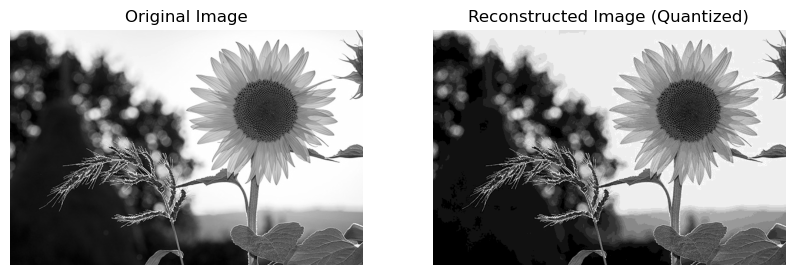

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Adjust grayscale levels to improve Huffman compression
def quantize_image(image_array, num_levels):
    # Quantize the image to reduce the number of unique pixel values
    max_value = 255
    scale_factor = max_value // (num_levels - 1)
    quantized_image = (image_array // scale_factor) * scale_factor
    return quantized_image

# Function to build a Huffman tree and codebook
class HuffmanNode:
    def __init__(self, symbol=None, frequency=0):
        self.symbol = symbol
        self.frequency = frequency
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.frequency < other.frequency

def build_huffman_tree(frequency):
    priority_queue = [HuffmanNode(symbol, freq) for symbol, freq in frequency.items()]
    heapq.heapify(priority_queue)
    
    while len(priority_queue) > 1:
        left = heapq.heappop(priority_queue)
        right = heapq.heappop(priority_queue)
        merged = HuffmanNode(frequency=left.frequency + right.frequency)
        merged.left = left
        merged.right = right
        heapq.heappush(priority_queue, merged)
        
    return priority_queue[0]

def build_huffman_codes(node, prefix="", codebook={}):
    if node.symbol is not None:
        codebook[node.symbol] = prefix
    else:
        build_huffman_codes(node.left, prefix + "0", codebook)
        build_huffman_codes(node.right, prefix + "1", codebook)
    return codebook

# Huffman encoding and decoding
def huffman_encode(image_array):
    flat_image = image_array.flatten()
    frequency = Counter(flat_image)
    root = build_huffman_tree(frequency)
    codebook = build_huffman_codes(root)
    encoded_image = ''.join(codebook[pixel] for pixel in flat_image)
    return encoded_image, codebook

def huffman_decode(encoded_image, codebook, shape):
    reverse_codebook = {v: k for k, v in codebook.items()}
    decoded_pixels, buffer = [], ""
    for bit in encoded_image:
        buffer += bit
        if buffer in reverse_codebook:
            decoded_pixels.append(reverse_codebook[buffer])
            buffer = ""
    return np.array(decoded_pixels).reshape(shape)

# Quantize image
num_levels = 16  # Reduce to 16 grayscale levels for better compression
quantized_image_array = quantize_image(image_array, num_levels)

# Huffman Encoding and Decoding
encoded_image, codebook = huffman_encode(quantized_image_array)
reconstructed_image_array = huffman_decode(encoded_image, codebook, quantized_image_array.shape)

# Calculate Compression Ratio
compression_ratio = calculate_compression_ratio_huffman(quantized_image_array, encoded_image)
print(f"Compression Ratio (Huffman with Quantization): {compression_ratio:.2f}")

# Calculate RMSE
rmse = calculate_rmse(quantized_image_array, reconstructed_image_array)
print(f"Root Mean Square Error (RMSE) (Huffman with Quantization): {rmse:.2f}")

# Display the original and reconstructed images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Reconstructed Image after Quantization
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image_array, cmap='gray')
plt.title("Reconstructed Image (Quantized)")
plt.axis('off')

plt.show()

### C. LZW Encoding for Image Compression


Compression Ratio: 2.68
Root Mean Square Error (RMSE): 0.00


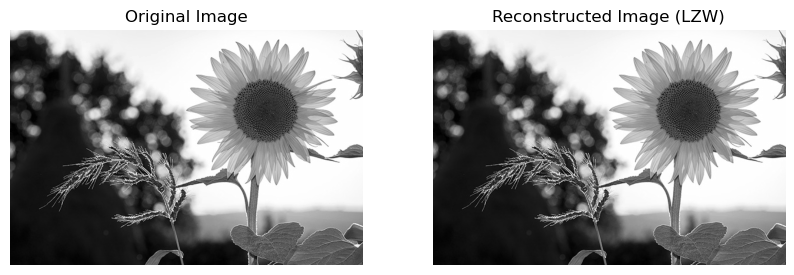

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to perform LZW encoding on an image
def lzw_encode(image_array):
    # Convert image array to a 1D string representation for LZW compression
    image_str = ''.join(map(chr, image_array.flatten()))
    
    # Initialize the dictionary with single character entries
    dictionary = {chr(i): i for i in range(256)}
    code = []
    s = ""
    
    for symbol in image_str:
        if s + symbol in dictionary:
            s += symbol
        else:
            code.append(dictionary[s])
            dictionary[s + symbol] = len(dictionary)
            s = symbol
    
    # Append the last code if there is any remaining
    if s:
        code.append(dictionary[s])
    
    return code, dictionary

# Function to decode an LZW compressed image
def lzw_decode(code, dictionary, shape):
    # Reverse the dictionary to map codes back to patterns
    reverse_dict = {v: k for k, v in dictionary.items()}
    
    # Initialize the decoded string with the first character from the code
    s = reverse_dict[code[0]]
    result = [ord(c) for c in s]
    
    for k in code[1:]:
        # Handle the case where k is not in reverse_dict
        if k in reverse_dict:
            entry = reverse_dict[k]
        else:
            entry = s + s[0]
        
        # Add the pattern to the decoded output
        result.extend(ord(c) for c in entry)
        
        # Update the dictionary for the next code
        reverse_dict[len(reverse_dict)] = s + entry[0]
        s = entry
    
    # Reshape the decoded result back into the original image shape
    return np.array(result).reshape(shape)

# Perform LZW encoding and decoding
lzw_encoded, dictionary = lzw_encode(image_array)
lzw_reconstructed = lzw_decode(lzw_encoded, dictionary, image_array.shape)

# Calculate Compression Ratio
compression_ratio = calculate_compression_ratio(image_array, lzw_encoded)
print(f"Compression Ratio: {compression_ratio:.2f}")

# Calculate RMSE
rmse = calculate_rmse(image_array, lzw_reconstructed)
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

# Display the original and reconstructed images
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display the reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(lzw_reconstructed, cmap='gray')
plt.title("Reconstructed Image (LZW)")
plt.axis('off')

plt.show()

### D. Run-Length Encoding (RLE) for Image Compression


Compression Ratio: 0.74
Root Mean Square Error (RMSE): 0.00


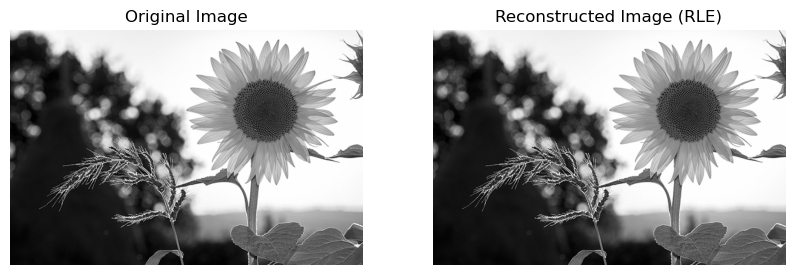

In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to perform Run-Length Encoding on an image
def rle_encode(image_array):
    # Flatten the image array to a 1D array for easier processing with RLE
    flat_image = image_array.flatten()
    encoded = []
    last_pixel = flat_image[0]
    count = 1
    
    # Iterate through the flattened array and count consecutive pixels
    for pixel in flat_image[1:]:
        if pixel == last_pixel:
            count += 1
        else:
            encoded.append((last_pixel, count))
            last_pixel = pixel
            count = 1
    
    # Append the last run
    encoded.append((last_pixel, count))
    return encoded

# Function to decode an RLE compressed image
def rle_decode(encoded, shape):
    # Reconstruct the image from the encoded list
    decoded = np.concatenate([[pixel] * count for pixel, count in encoded])
    return decoded.reshape(shape)

# Perform RLE encoding and decoding
rle_encoded = rle_encode(image_array)
rle_reconstructed = rle_decode(rle_encoded, image_array.shape)

# Calculate Compression Ratio
compression_ratio = calculate_compression_ratio(image_array, rle_encoded)
print(f"Compression Ratio: {compression_ratio:.2f}")

# Calculate RMSE
rmse = calculate_rmse(image_array, rle_reconstructed)
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

# Display the original and reconstructed images
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display the reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(rle_reconstructed, cmap='gray')
plt.title("Reconstructed Image (RLE)")
plt.axis('off')

plt.show()

### E. Arithmetic Coding for Image Compression


Encoded Value: 0.7353967155945771
Compression Ratio: 30000.00
Root Mean Square Error (RMSE): 9.53


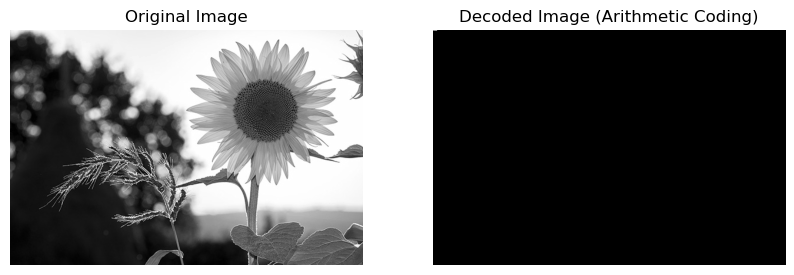

In [44]:
import cv2
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# Flatten the image to create a sequence
sequence = image.flatten()

# Function to calculate probability ranges for each pixel value
def calculate_prob_ranges(sequence):
    total_pixels = len(sequence)
    freq = Counter(sequence)
    prob_ranges = {}
    current_low = 0.0

    # Calculate cumulative probability ranges for each pixel value
    for pixel_value, count in sorted(freq.items()):
        probability = count / total_pixels
        current_high = current_low + probability
        prob_ranges[pixel_value] = (current_low, current_high)
        current_low = current_high

    return prob_ranges

# Arithmetic encoding function
def arithmetic_encode(sequence, prob_ranges):
    low, high = 0.0, 1.0

    for pixel in sequence:
        pixel_low, pixel_high = prob_ranges[pixel]
        range_ = high - low
        high = low + range_ * pixel_high
        low = low + range_ * pixel_low

    return (low + high) / 2  # Encoded as a single value within the final range

# Arithmetic decoding function
def arithmetic_decode(encoded_value, prob_ranges, sequence_length):
    low, high = 0.0, 1.0
    decoded_sequence = []

    for _ in range(sequence_length):
        range_ = high - low
        for pixel, (pixel_low, pixel_high) in prob_ranges.items():
            pixel_range_low = low + range_ * pixel_low
            pixel_range_high = low + range_ * pixel_high
            if pixel_range_low <= encoded_value < pixel_range_high:
                decoded_sequence.append(pixel)
                low, high = pixel_range_low, pixel_range_high
                break

    return decoded_sequence

# Step 1: Calculate probability ranges for each pixel value
prob_ranges = calculate_prob_ranges(sequence)

# Step 2: Encode the sequence using Arithmetic Encoding
encoded_value = arithmetic_encode(sequence, prob_ranges)

# Step 3: Decode the sequence to retrieve the original image
decoded_sequence = arithmetic_decode(encoded_value, prob_ranges, len(sequence))
decoded_image = np.array(decoded_sequence, dtype=np.uint8).reshape(original_shape)

# Calculate Compression Ratio
original_size = image.size * 8  # 8 bits per pixel in the original image
compressed_size = len(bin(int(encoded_value * (2 ** 64)))) - 2  # Approx. bits for encoding
compression_ratio = original_size / compressed_size

# Calculate RMSE
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

rmse = calculate_rmse(image, decoded_image)

# Display results
print("Encoded Value:", encoded_value)
print(f"Compression Ratio: {compression_ratio:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

# Display the original and decoded images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Decoded image
plt.subplot(1, 2, 2)
plt.imshow(decoded_image, cmap='gray')
plt.title("Decoded Image (Arithmetic Coding)")
plt.axis('off')

plt.show()

####  Block-Based Arithmetic Coding

Compression Ratio: 0.74
Root Mean Square Error (RMSE): 5.82


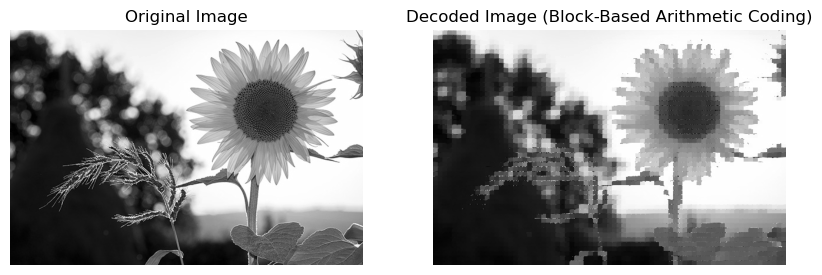

In [31]:
import cv2
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

original_shape = image.shape

# Function to calculate probability ranges for each pixel value
def calculate_prob_ranges(sequence):
    total_pixels = len(sequence)
    freq = Counter(sequence)
    prob_ranges = {}
    current_low = 0.0

    for pixel_value, count in sorted(freq.items()):
        probability = count / total_pixels
        current_high = current_low + probability
        prob_ranges[pixel_value] = (current_low, current_high)
        current_low = current_high

    return prob_ranges

# Arithmetic encoding for a single sequence
def arithmetic_encode(sequence, prob_ranges):
    low, high = 0.0, 1.0
    for pixel in sequence:
        pixel_low, pixel_high = prob_ranges[pixel]
        range_ = high - low
        high = low + range_ * pixel_high
        low = low + range_ * pixel_low
    return (low + high) / 2  # Encoded as a single value within the final range

# Arithmetic decoding function for a single sequence
def arithmetic_decode(encoded_value, prob_ranges, sequence_length):
    low, high = 0.0, 1.0
    decoded_sequence = []
    for _ in range(sequence_length):
        range_ = high - low
        for pixel, (pixel_low, pixel_high) in prob_ranges.items():
            pixel_range_low = low + range_ * pixel_low
            pixel_range_high = low + range_ * pixel_high
            if pixel_range_low <= encoded_value < pixel_range_high:
                decoded_sequence.append(pixel)
                low, high = pixel_range_low, pixel_range_high
                break
    return decoded_sequence

# Define block size (e.g., 8x8)
block_size = 8
compressed_bits = 0
decoded_image = np.zeros_like(image)

# Perform encoding and decoding in blocks
for i in range(0, original_shape[0], block_size):
    for j in range(0, original_shape[1], block_size):
        # Get the block
        block = image[i:i+block_size, j:j+block_size].flatten()
        
        # Step 1: Calculate probability ranges for the block
        prob_ranges = calculate_prob_ranges(block)
        
        # Step 2: Encode the block
        encoded_value = arithmetic_encode(block, prob_ranges)
        
        # Step 3: Decode the block
        decoded_block = arithmetic_decode(encoded_value, prob_ranges, len(block))
        decoded_image[i:i+block_size, j:j+block_size] = np.array(decoded_block).reshape(block_size, block_size)
        
        # Calculate required bits for the encoded value
        required_bits = len(bin(int(encoded_value * (2 ** 64)))) - 2  # Use 64-bit precision
        compressed_bits += required_bits

rmse = calculate_rmse(image, decoded_image)

# Display results
print(f"Compression Ratio: {compression_ratio:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

# Display the original and decoded images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Decoded image
plt.subplot(1, 2, 2)
plt.imshow(decoded_image, cmap='gray')
plt.title("Decoded Image (Block-Based Arithmetic Coding)")
plt.axis('off')

plt.show()
